In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


PROJECT_ROOT_DIR = "."
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "Images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

    
def plot_learning_curves(model, X, y, title=None):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)+1):
        model.fit(X_train[:m], y_train[:m]) # 调用模型
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))    
    
    print(model.intercept_, model.coef_) # 打印出最佳参数的取值
    plt.title(title)
    plt.plot(np.sqrt(train_errors), label="train")
    plt.plot(np.sqrt(val_errors),  label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

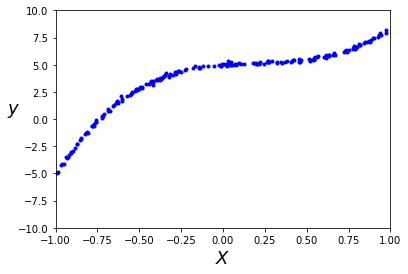

In [2]:
# 生成一个包含200条数据的数据集
np.random.seed(42)
m = 200
X = 2 * np.random.rand(m, 1) - 1
y = 5.6*X**3 - 3.4*X**2 + 1.2*X + 5 + np.random.normal(0, 0.1, size=(m,1))
plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-1, 1, -10, 10])
plt.show()

### 2）先使⽤与数据⽣成函数同阶的三阶多项式函数拟合。

[4.99543715] [[ 1.23762358 -3.3675671   5.53132528]]
Saving figure 1


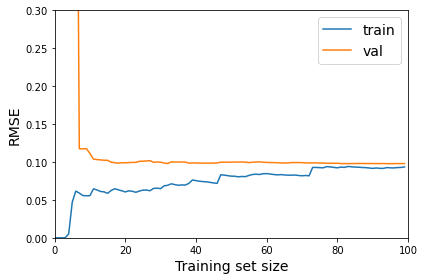

In [3]:
# 先使⽤与数据⽣成函数同阶的三阶多项式函数拟合
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X) #X_poly对X添加了新的特征

# 对扩展后的训练集匹配一个LinearRegression模型
lin_reg = LinearRegression()
# 画出训练过程中模型分别在训练集和验证集上的学习曲线
plot_learning_curves(lin_reg, X_poly, y)
plt.axis([0, 100, 0, 0.3])
save_fig("1")

###### ③尝试使用不同的学习率η

[4.9813531] [ 1.28209761 -3.37423321  5.57597284]
Saving figure 2


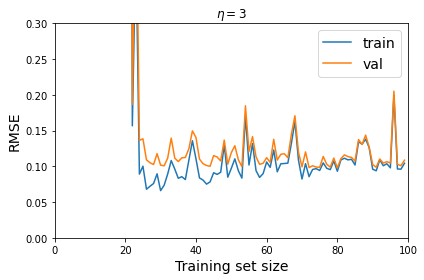

In [4]:
# 学习率过大:η=3
sgd_reg1 = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=3, random_state=42)
plot_learning_curves(sgd_reg1, X_poly, y.ravel(),title="$η=3$")
plt.axis([0, 100, 0, 0.3])
save_fig("2")

[1.98500942] [0.9736629  0.41979922 0.68959704]
Saving figure 3


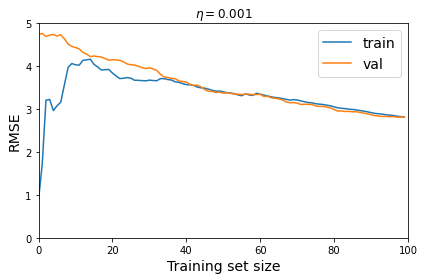

In [5]:
# 学习率过小:η=0.001
sgd_reg2 = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.001, random_state=42)
plot_learning_curves(sgd_reg2, X_poly, y.ravel(),title="$η=0.001$")
plt.axis([0, 100, 0, 5])
save_fig("3")

[4.99569509] [ 1.2917565  -3.37172268  5.46677036]
Saving figure 4


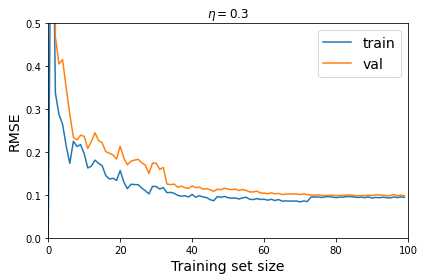

In [6]:
# 学习率正好:η=0.3
sgd_reg3 = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.3, random_state=42)
plot_learning_curves(sgd_reg3, X_poly, y.ravel(),title="$η=0.3$")
plt.axis([0, 100, 0, 0.5])
save_fig("4")

### 3）再试试直接用线性函数拟合。

[3.86511425] [[4.55576539]]
Saving figure 5


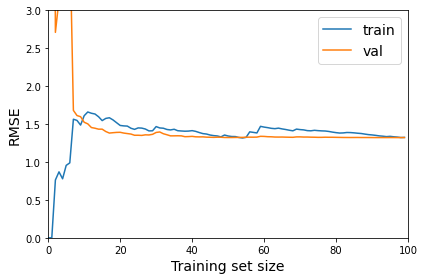

In [7]:
linear_regression = LinearRegression()
plot_learning_curves(linear_regression, X, y)
plt.axis([0, 100, 0, 3])
save_fig("5")

### 4）使⽤三阶多项式函数模型来拟合，请注意，这次，只使⽤2个样本来训练模型。

### 5）使⽤40阶多项式函数模型来拟合。

[5.01677319] [[ 2.32492409e-01 -2.30394132e+01  2.60829658e+02  3.66839742e+03
  -2.04871895e+04 -2.21822869e+05  7.79381473e+05  6.78701386e+06
  -1.72001412e+07 -1.25430347e+08  2.44916780e+08  1.53995209e+09
  -2.40039234e+09 -1.33186667e+10  1.69113837e+10  8.43514615e+10
  -8.82902874e+10 -4.01683980e+11  3.48902958e+11  1.46433076e+12
  -1.05847134e+12 -4.13390937e+12  2.48505953e+12  9.09271379e+12
  -4.52622335e+12 -1.55975163e+13  6.37385340e+12  2.07731807e+13
  -6.86901336e+12 -2.12449662e+13  5.55673304e+12  1.63560388e+13
  -3.26401071e+12 -9.16579572e+12  1.31379993e+12  3.52734450e+12
  -3.23975280e+11 -8.33264124e+11  3.68959941e+10  9.10731986e+10]]
Saving figure 6


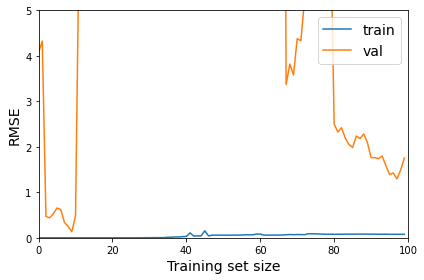

In [8]:
poly_features_40 = PolynomialFeatures(degree=40, include_bias=False)
X_poly_40 = poly_features_40.fit_transform(X)

lin_reg_40 = LinearRegression()
plot_learning_curves(lin_reg_40, X_poly_40, y)
plt.axis([0, 100, 0, 5])
save_fig("6")

4.792648181511375 [ 2.19019975 -1.99792592  2.13146801 -0.99009263  1.3790219  -0.45572006
  0.84471717 -0.18625306  0.50412577 -0.04694692  0.28893372  0.02561486
  0.15216527  0.0622642   0.06477961  0.07893559  0.00896476  0.08430181
 -0.02634555  0.08326694 -0.04814978  0.07867878 -0.06095565  0.07221998
 -0.0677178   0.06489397 -0.07040445  0.05729979 -0.07034595  0.04979179
 -0.06845309  0.04257455 -0.06535623  0.03576026 -0.0614954   0.02940401
 -0.05717966  0.02352561 -0.05262678  0.01812335]
Saving figure 7


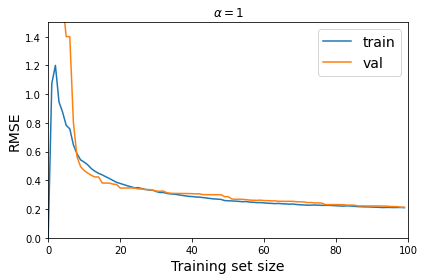

In [9]:
# 尝试利用L2正则化技术，让该模型的表现好起来
from sklearn.linear_model import Ridge
ridge_regression_1 = Ridge(alpha=1, solver="cholesky", random_state=42)
plot_learning_curves(ridge_regression_1, X_poly_40, y.ravel(), title=r"$\alpha = 1$")
plt.axis([0, 100, 0, 1.5])
save_fig("7")

5.019169830216255 [  0.93449821  -3.63673426  10.24972196  -0.85301067 -17.83774384
   8.44127224  17.48497098 -10.94912959   8.70512859  -5.16181598
  -5.52634178   4.19350598 -10.19622085   7.01581472  -7.02997942
   4.41131956  -1.19137955   0.12598223   3.64987755  -3.14896977
   5.96976535  -4.35324992   5.75054392  -3.59140486   3.73708826
  -1.55395731   0.91068237   0.90103933  -1.80739957   2.98593685
  -3.68854695   4.08959232  -4.23175257   3.80349702  -3.14809125
   1.9060812   -0.32385947  -1.67078619   4.22147988  -6.87952094]
Saving figure 8


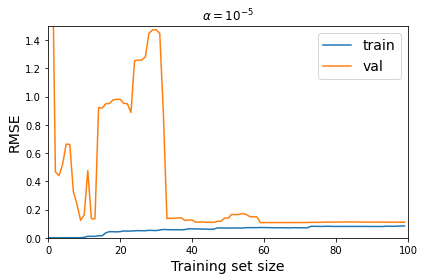

In [10]:
# 使用不同的正则化强度:alpha = 10^-5
ridge_regression_2 = Ridge(alpha=10**-5, solver="cholesky", random_state=42)
plot_learning_curves(ridge_regression_2, X_poly_40, y.ravel(), title=r"$\alpha = 10^{-5}$")
plt.axis([0, 100, 0, 1.5])
save_fig("8")

4.987924548021155 [ 1.43707121e+00 -3.26740161e+00  4.43482296e+00 -1.20964883e-01
  1.20218427e+00 -4.41080845e-02  2.15152274e-01 -1.76424960e-01
 -7.22648195e-02 -1.38312175e-01 -1.59098942e-01 -1.87398124e-02
 -1.75136861e-01  1.00428129e-01 -1.60813069e-01  1.85409948e-01
 -1.33390127e-01  2.29958575e-01 -1.01634696e-01  2.38935409e-01
 -6.98545103e-02  2.20225729e-01 -3.97444737e-02  1.81488264e-01
 -1.15577435e-02  1.29123767e-01  1.51302738e-02  6.81370666e-02
  4.09612017e-02  2.30615733e-03  6.65463033e-02 -6.55786372e-02
  9.23556049e-02 -1.33490890e-01  1.18686519e-01 -1.99983670e-01
  1.45674019e-01 -2.64045562e-01  1.73319158e-01 -3.24990982e-01]
Saving figure 9


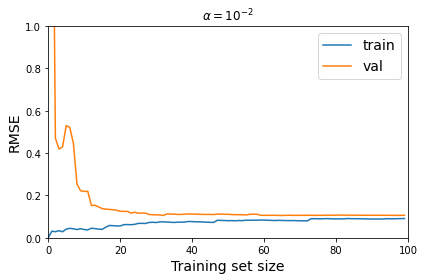

In [11]:
# 使用不同的正则化强度:alpha = 0.01
ridge_regression_3 = Ridge(alpha=0.01, solver="cholesky", random_state=42)
plot_learning_curves(ridge_regression_3, X_poly_40, y.ravel(), title=r"$\alpha = 10^{-2}$")
plt.axis([0, 100, 0, 1])
save_fig("9")

3.7007960829309856 [ 1.57277938e-03 -3.15181127e-04  1.06695432e-03 -2.77009216e-04
  8.03830007e-04 -2.40080997e-04  6.40402189e-04 -2.12545874e-04
  5.28894379e-04 -1.91497817e-04  4.48067387e-04 -1.74688343e-04
  3.86926696e-04 -1.60776425e-04  3.39169203e-04 -1.48961580e-04
  3.00910734e-04 -1.38741864e-04  2.69626896e-04 -1.29783094e-04
  2.43607965e-04 -1.21849809e-04  2.21656509e-04 -1.14768021e-04
  2.02909872e-04 -1.08404263e-04  1.86731289e-04 -1.02653187e-04
  1.72640685e-04 -9.74298373e-05  1.60269362e-04 -9.26645635e-05
  1.49329527e-04 -8.82995296e-05  1.39593316e-04 -8.42862157e-05
  1.30878033e-04 -8.05835734e-05  1.23035559e-04 -7.71566272e-05]
Saving figure 10


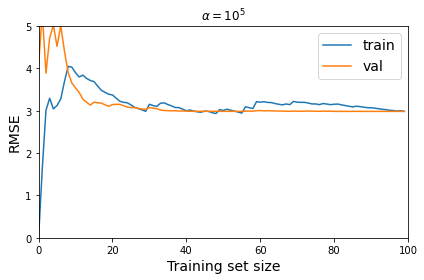

In [12]:
# 使用不同的正则化强度:alpha = 10^5
ridge_regression_3 = Ridge(alpha=10**5, solver="cholesky", random_state=42)
plot_learning_curves(ridge_regression_3, X_poly_40, y.ravel(), title=r"$\alpha = 10^{5}$")
plt.axis([0, 100, 0, 5])
save_fig("10")